Traceback (most recent call last):
  File "/Users/tsuiki/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/Users/tsuiki/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/Users/tsuiki/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1081, in _start
    self._init_draw()
  File "/Users/tsuiki/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1792, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/Users/tsuiki/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1817, in _draw_frame
    raise RuntimeError('The animation function must return a '
RuntimeError: The animation function must return a sequence of Artist objects.


RuntimeError: The animation function must return a sequence of Artist objects.

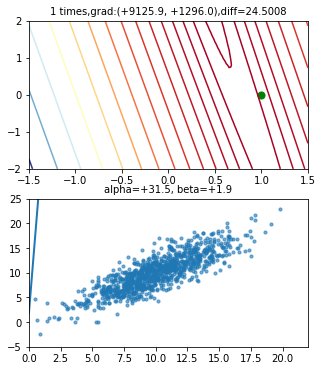

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation as ani
np.random.seed()

def vec_shuffle(vec):
    ind = range(len(vec))
    np.random.shuffle(ind)
    return np.array([vec[i] for i in ind])

# vec: target vector, from_ind: index value (from 0)
def pickup_two_sample(vec, from_ind):
    return vec[from_ind:from_ind+2]

def random_multi_sample_picker(vec, n=2):
    ret_list = []
    for i in range(n):
        ret_list.append(vec[np.random.randint(len(vec))])
    
    return np.array(ret_list)
    
def generate_train_data():
    ''' Create Train Data
    # y = x + 0 + e
    # e = N(0, 2) - normal distribution
    np.random.seed(10)  # For fix random values
    '''
    
    N = 1000
    alpha = 1
    beta  = 0
    e = np.random.normal(0, 2, N)
    x = np.random.normal(10,3,N)
    y = alpha*x + beta + e
    np.random.seed()
    np.random.seed()
    return np.c_[x,y]

def displayScatter():
    plt.figure(figsize=(9,6))
    plt.xlim(0, 22)
    plt.scatter(data[:,0],data[:,1], s=10, alpha=0.6)
    
ratio = 2
alpha = 1
beta  = 0
a_low  =  -1.5
a_high =  1.5
b_low  =  -2
b_high =  2

af = np.linspace(a_low, a_high, 100)
bf = np.linspace(b_low, b_high, 100)
A, B = np.meshgrid(af, bf)
data = generate_train_data()

maxnum = 500

# starting point
init_a = -1.5
init_b = -1.5

a = init_a
b = init_b
def animate(i):
    global a
    global b
    global alpha
    global beta

    # ------------- Logic Part ------------------# 
    d = random_multi_sample_picker(data,3)
    x1, y1, x2, y2, x3, y3 = d[0,0], d[0,1], d[1,0], d[1,1], d[2,0], d[2,1]
    
    Z = (y1 - A*x1 - B) ** 2 + (y2 - A*x2 - B) ** 2  + (y3 - A*x3 - B) ** 2 
    
    grad_a = np.sum([(2*a*(x**2) - 2*x*y + 2*b*x) for x, y in [[x1, y1],[x2,y2],[x3,y3]]])
    grad_b = np.sum([(-2*y + 2*a*x + 2*b) for x, y in [[x1, y1],[x2,y2],[x3,y3]]])
    
    current_z = (y1 - a*x1 - b) ** 2 + (y2 - a*x2 - b) ** 2  + (y3 - a*x3 - b) ** 2 
    next_a = a -((i+1)**(-1)) * (1/np.sqrt(np.abs(current_z))) * grad_a 
    next_b = b -((i+1)**(-1)) * (1/np.sqrt(np.abs(current_z))) * grad_b 
    
    diff = np.sqrt((next_a-a)**2 + (next_b-b)**2)    # Distance between current and true position
    
    # -------------  Graph Drawing part ------------------# 
    # Countour drawing
    plt.clf()
    plt.subplot(2,1,1)
    plt.xlim(a_low,a_high)
    plt.ylim(b_low,b_high)
    ex = 5.
    mul = 10
    edge = 3000**(1/ex)/mul
    interval = [((mul*x)**ex) for x in np.linspace(0,edge,30)]   # In order to draw contour line as same interval for each line
    plt.title("%d times,grad:(%+04.1f, %0+3.1f),diff=%.4f" % (i+1, grad_a, grad_b, diff), fontsize=10)
  
    CS = plt.contour(A, B, Z, interval,  cmap="RdYlBu")
    
    # Position marker
    plt.scatter(a, b, s=40, c="b")                  # Current position
    plt.plot([a, next_a],[b, next_b], c="k")     # Line for next position
    plt.scatter(alpha, beta, s=50, c="g")        # True position
  
    if diff < 0.001:
        print ("break.")
        #break;
    
    # Drawing scatter plot for indicating regression line transition
    plt.subplot(2,1,2)
    d = generate_train_data()
    plt.xlim(0, 22)
    plt.ylim(-5,25)
    plt.title("alpha=%+04.1f, beta=%+02.1f" % (a, b), fontsize=10)
    plt.scatter(d[:,0],d[:,1], s=10, alpha=0.6)
    plt.plot([0,22],[b,22*a+b], linewidth=2)
    
    a = next_a
    b = next_b

fig = plt.figure(figsize=(5, 6))
anim = ani.FuncAnimation(fig, animate, frames=80, blit=True)
anim.save('SGD_anim.gif', writer='imagemagick', fps=6, dpi=64)
